<a href="https://colab.research.google.com/github/grizzly42/MPA-MLF/blob/main/Ex_08.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MKA-MLF, Lab_08 - RNN

Recurrent Neural Networks, are a class of artificial neural networks designed to recognize patterns in sequences of data, such as text, genomes, handwriting, or spoken words. Unlike traditional neural networks, which assume all inputs (and outputs) are independent of each other, RNNs are designed to recognize sequential or temporal patterns, making them especially suited for tasks like language modeling, speech recognition, and time series prediction.

## Exercise 1 - Time Series Forecasting

### 1.0 Import Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras.layers import Dense, Flatten, SimpleRNN
from keras.models import Sequential
from tensorflow.keras.optimizers import Adam


### 1.1 Generating dataset

In [2]:
def generate_time_series(batch_size, n_steps):
  freq1, freq2, offsets1, offsets2 = np.random.rand(4, batch_size, 1)
  time = np.linspace(0,1,n_steps)

  series = 0.5 * np.sin((time - offsets1) * (freq1*10 + 10))
  series += 0.2 * np.sin((time - offsets2) * (freq2*20 + 20))
  series += 0.1 * (np.random.rand(batch_size, n_steps)- 0.5)
  return series[..., np.newaxis].astype(np.float32)

In [3]:
data_size = 10000
n_steps = 50
np.random.seed(0)

series = generate_time_series(data_size, n_steps + 1)

### 1.2 Train/Valid/Test split

In [4]:
X_train, y_train = series[:7000, :n_steps], series[:7000, -1]
X_valid, y_valid = series[7000:9000, :n_steps], series[7000:9000, -1]
X_test, y_test = series[9000:, :n_steps], series[9000:, -1]

In [5]:
no_training_epochs = 5

### 1.3 Data examination

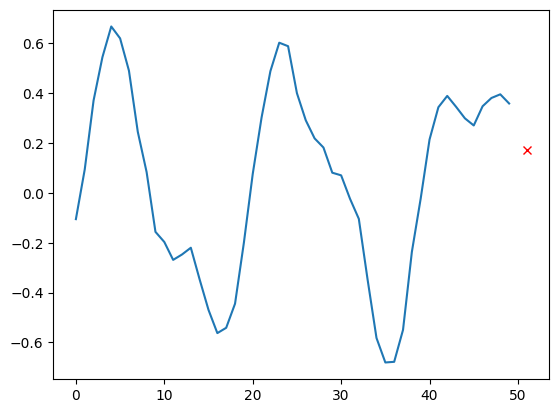

In [6]:
plt.figure()
plt.plot(X_train[0])
plt.plot(n_steps+1, y_train[0], 'rx')

### 1.4 Simple Linear model

In [7]:
# Model definition
model_linear = Sequential()
model_linear.add(Flatten(input_shape=(50,1)))
model_linear.add(Dense(1, activation = None))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [8]:
# Model building

learning_rate = 0.001
optimizer = Adam(learning_rate)
model_linear.compile(loss='mean_squared_error', optimizer=optimizer, metrics=['mean_squared_error'])

In [9]:
model_linear.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 51 (204.00 B)

 Trainable params: 51 (204.00 B)

 Non-trainable params: 0 (0.00 B)

In [10]:
# Model training

history_linear = model_linear.fit(X_train, y_train, epochs=no_training_epochs, validation_data=[X_valid, y_valid])

Epoch 1/5
219/219 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - loss: 0.5144 - mean_squared_error: 0.5144 - val_loss: 0.1626 - val_mean_squared_error: 0.1626
Epoch 2/5
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.1219 - mean_squared_error: 0.1219 - val_loss: 0.0610 - val_mean_squared_error: 0.0610
Epoch 3/5
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0526 - mean_squared_error: 0.0526 - val_loss: 0.0348 - val_mean_squared_error: 0.0348
Epoch 4/5
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0327 - mean_squared_error: 0.0327 - val_loss: 0.0249 - val_mean_squared_error: 0.0249
Epoch 5/5
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0244 - mean_squared_error: 0.0244 - val_loss: 0.0196 - val_mean_squared_error: 0.0196


In [11]:
def plot_function(history):
  plt.figure()

  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='validation_loss')
  plt.legend()
  plt.grid()
  plt.xlim([0,no_training_epochs-1])
  plt.xlabel('epochs')

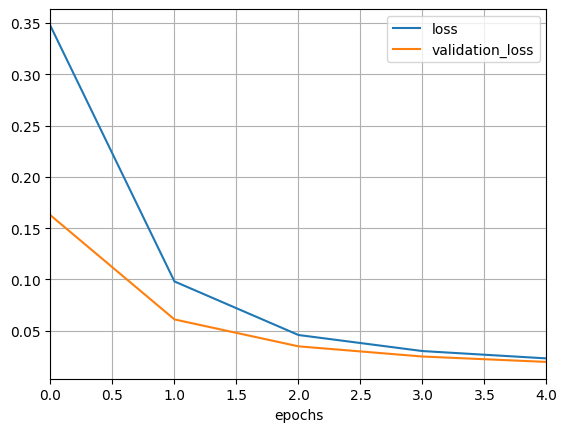

In [12]:
plot_function(history_linear)

In [13]:
score = model_linear.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print(f'Test MSE: ', score[1])

Test loss: 0.020134231075644493
Test MSE:  0.020134231075644493


### 1.5 Simple RNN Model

In [14]:
model_simple_rnn = Sequential()
model_simple_rnn.add(SimpleRNN(1, input_shape=[50, 1]))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [15]:
learning_rate_simple_rnn = 0.001
optimizer_simple_rnn = Adam(learning_rate_simple_rnn)
model_simple_rnn.compile(loss='mean_squared_error', optimizer=optimizer_simple_rnn, metrics=['mean_squared_error'])

In [16]:
history_simple_rnn = model_simple_rnn.fit(X_train, y_train, epochs=no_training_epochs, validation_data=[X_valid, y_valid])

Epoch 1/5
219/219 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - loss: 0.0199 - mean_squared_error: 0.0199 - val_loss: 0.0126 - val_mean_squared_error: 0.0126
Epoch 2/5
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0126 - mean_squared_error: 0.0126 - val_loss: 0.0115 - val_mean_squared_error: 0.0115
Epoch 3/5
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0112 - mean_squared_error: 0.0112 - val_loss: 0.0114 - val_mean_squared_error: 0.0114
Epoch 4/5
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0109 - mean_squared_error: 0.0109 - val_loss: 0.0114 - val_mean_squared_error: 0.0114
Epoch 5/5
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0111 - mean_squared_error: 0.0111 - val_loss: 0.0113 - val_mean_squared_error: 0.0113


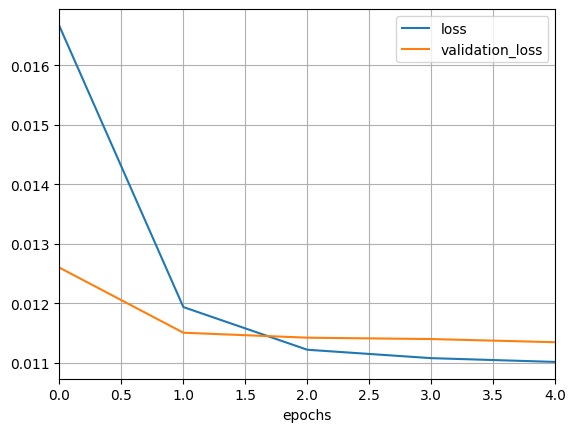

In [17]:
plot_function(history_simple_rnn)

### 1.5 Deep RNN Model

In [18]:
model_deep_rnn = Sequential()
model_deep_rnn.add(SimpleRNN(20, return_sequences = True, input_shape=[50, 1]))
model_deep_rnn.add(SimpleRNN(20, return_sequences = True))
model_deep_rnn.add(SimpleRNN(1, input_shape=[50, 1]))

In [19]:
learning_rate_deep_rnn = 0.001
optimizer_deep_rnn = Adam(learning_rate_deep_rnn)
model_deep_rnn.compile(loss='mean_squared_error', optimizer=optimizer_deep_rnn, metrics=['mean_squared_error'])

In [20]:
history_deep_rnn = model_deep_rnn.fit(X_train, y_train, epochs=no_training_epochs, validation_data=[X_valid, y_valid])

Epoch 1/5
219/219 ━━━━━━━━━━━━━━━━━━━━ 10s 24ms/step - loss: 0.1030 - mean_squared_error: 0.1030 - val_loss: 0.0083 - val_mean_squared_error: 0.0083
Epoch 2/5
219/219 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - loss: 0.0073 - mean_squared_error: 0.0073 - val_loss: 0.0055 - val_mean_squared_error: 0.0055
Epoch 3/5
219/219 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - loss: 0.0050 - mean_squared_error: 0.0050 - val_loss: 0.0041 - val_mean_squared_error: 0.0041
Epoch 4/5
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0040 - mean_squared_error: 0.0040 - val_loss: 0.0037 - val_mean_squared_error: 0.0037
Epoch 5/5
219/219 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.0035 - mean_squared_error: 0.0035 - val_loss: 0.0037 - val_mean_squared_error: 0.0037


In [21]:
score = model_deep_rnn.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print(f'Test MSE: ', score[1])

Test loss: 0.003648369573056698
Test MSE:  0.003648369573056698


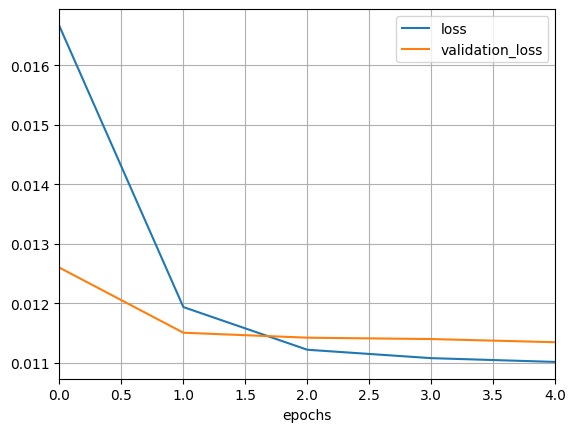

In [22]:
plot_function(history_simple_rnn)

## Exercise 2 - The movie review




Based on the written rewiev, classify if the movie if good or bad

### 2.0 - Import libraries

In [23]:
import keras
from tensorflow.keras.preprocessing.text import Tokenizer
import numpy as np
from keras.models import Sequential
from keras.layers import LSTM, Dense, Embedding, SimpleRNN, GRU, Dropout
from keras.preprocessing.sequence import pad_sequences
import matplotlib.pyplot as plt
from keras.optimizers import Adam
from tensorflow.keras.regularizers import l2

### 2.1 - Load dataset

In [24]:
(X_train, y_train), (X_test, y_test) = keras.datasets.imdb.load_data()

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


### 2.2 - Dataset examination

In [25]:
word_index = keras.datasets.imdb.get_word_index()
id_to_word = {id_ + 3:word for word, id_ in word_index.items()}
for id_, token in enumerate(("<pad>", "<sos>", "<unk>")):
  id_to_word[id_] = token

1641221/1641221 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [26]:
single_sequence = " ".join([id_to_word[id_] for id_ in X_train[0][:]])

In [27]:
single_sequence

"<sos> this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert redford's is an amazing actor and now the same being director norman's father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for retail and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also congratulations to the two little boy's that played the part's of norman and paul they were just brilliant children are often left out of the praising list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and shou

In [28]:
max_length = 150  # Define the maximum length of a review
X_train = keras.preprocessing.sequence.pad_sequences(X_train, maxlen=max_length, padding='post', truncating='post', value=0)
X_test = keras.preprocessing.sequence.pad_sequences(X_test, maxlen=max_length, padding='post', truncating='post', value=0)

In [29]:
embed_size = 128
vocabulary_size = 1000

"""
model = keras.models.Sequential([
    keras.layers.Embedding(vocabulary_size, embed_size,
                           input_shape=[None]),
    keras.layers.SimpleRNN(128, return_sequences=True),
    keras.layers.SimpleRNN(128),
    keras.layers.Dense(1, activation='sigmoid')
    ])
"""
model = keras.models.Sequential([
    keras.layers.Embedding(vocabulary_size, embed_size, input_shape=[None]),
    keras.layers.LSTM(128, return_sequences=True, kernel_regularizer=l2(0.0001)),
    Dropout(0.2),
    keras.layers.LSTM(128, kernel_regularizer=l2(0.0001)),
    Dropout(0.2),
    keras.layers.Dense(1, activation='sigmoid', kernel_regularizer=l2(0.0001))
])



model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ (None, None, 128)           │         128,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ (None, None, 128)           │         131,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, None, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 128)                 │         131,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 391,297 (1.49 MB)

 Trainable params: 391,297 (1.49 MB)

 Non-trainable params: 0 (0.00 B)

In [30]:
optimizer = Adam(learning_rate = 0.001)

In [31]:
model.compile(loss="binary_crossentropy", optimizer=optimizer, metrics=["accuracy"])

In [32]:
history = model.fit(X_train, y_train, epochs=5, validation_split=0.2)

Epoch 1/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 16s 17ms/step - accuracy: 0.5289 - loss: 0.6995 - val_accuracy: 0.7244 - val_loss: 0.5620
Epoch 2/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 17s 16ms/step - accuracy: 0.6892 - loss: 0.5972 - val_accuracy: 0.5576 - val_loss: 0.6863
Epoch 3/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 11s 17ms/step - accuracy: 0.5511 - loss: 0.6823 - val_accuracy: 0.5178 - val_loss: 0.6920
Epoch 4/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 10s 16ms/step - accuracy: 0.5556 - loss: 0.6834 - val_accuracy: 0.5118 - val_loss: 0.7031
Epoch 5/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 10s 16ms/step - accuracy: 0.6600 - loss: 0.6231 - val_accuracy: 0.7940 - val_loss: 0.4697


In [33]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print(f'Test accuracy: ', score[1]*100, "%")

Test loss: 0.4611761271953583
Test accuracy:  79.78000044822693 %


TASK: Modify structure, change the core of the network from RNN to LTSM and

With the initial neural network architecture, I achieved an accuracy of around 50%. After modifying the model by replacing the basic layers with an LSTM while keeping the overall structure unchanged, the accuracy improved significantly to 79.78%. Further adjustments, such as adding L2 regularization and Dropout layers, resulted in similar performance, contributing mainly to better training stability and reduced overfitting rather than a substantial accuracy gain.